<a href="https://colab.research.google.com/github/gawaresumit/-NewOne/blob/main/Image_Processing_Using_NumPypynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Simulate a 2D Grayscale Image


In [2]:
# Generate a 256×256 grayscale image with random pixel values in [0, 255]
image = np.random.randint(0, 256, (256, 256), dtype=np.uint8)


# Problem 1: Brightness and Contrast Adjustment

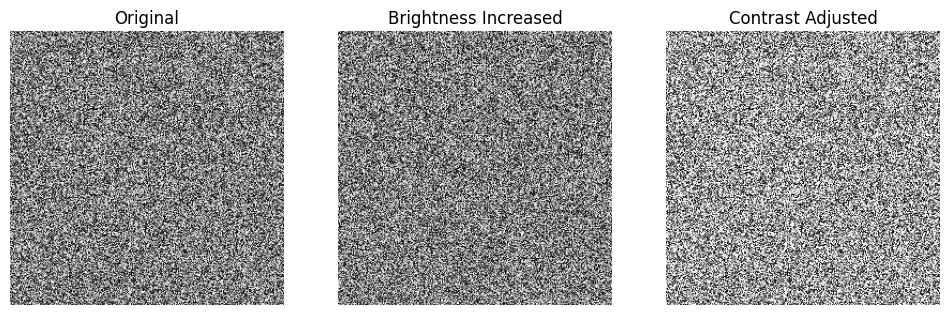

In [3]:
brightness_value = 50   # Increase brightness
a = 1.2                # Contrast gain
b = 10                 # Contrast bias

# Increase brightness
bright_image = image + brightness_value

# Adjust contrast
contrast_image = (a * image + b).astype(np.float32)

# Clip values to [0, 255] and convert to uint8
bright_image = np.clip(bright_image, 0, 255).astype(np.uint8)
contrast_image = np.clip(contrast_image, 0, 255).astype(np.uint8)

# Display
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1), plt.title("Original")
plt.imshow(image, cmap='gray'), plt.axis('off')

plt.subplot(1, 3, 2), plt.title("Brightness Increased")
plt.imshow(bright_image, cmap='gray'), plt.axis('off')

plt.subplot(1, 3, 3), plt.title("Contrast Adjusted")
plt.imshow(contrast_image, cmap='gray'), plt.axis('off')
plt.show()


# Problem 2: Image Thresholding and Masking

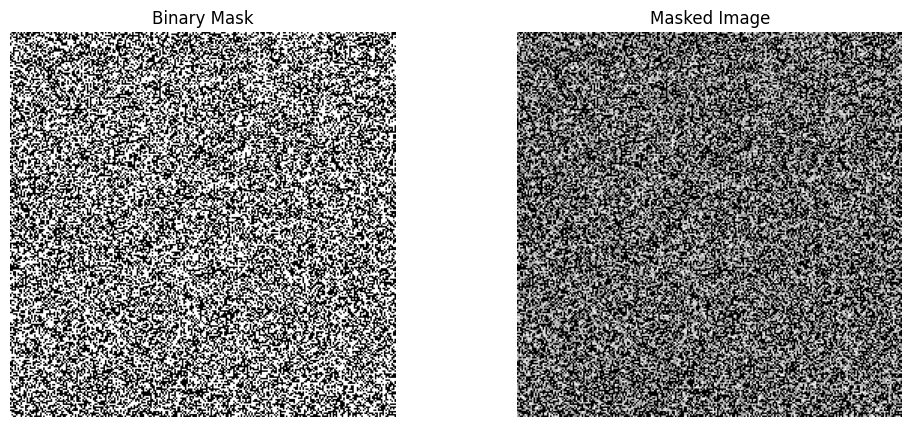

In [4]:
threshold = 120
mask = image > threshold   # Binary mask

masked_image = image * mask  # Keeps only bright pixels

# Display mask and result
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1), plt.title("Binary Mask")
plt.imshow(mask, cmap='gray'), plt.axis('off')

plt.subplot(1, 2, 2), plt.title("Masked Image")
plt.imshow(masked_image, cmap='gray'), plt.axis('off')
plt.show()


# Problem 3: Sustainability-Linked Image Indexing

Low Vegetation     : 40.01 %
Medium Vegetation  : 30.18 %
High Vegetation    : 29.8 %


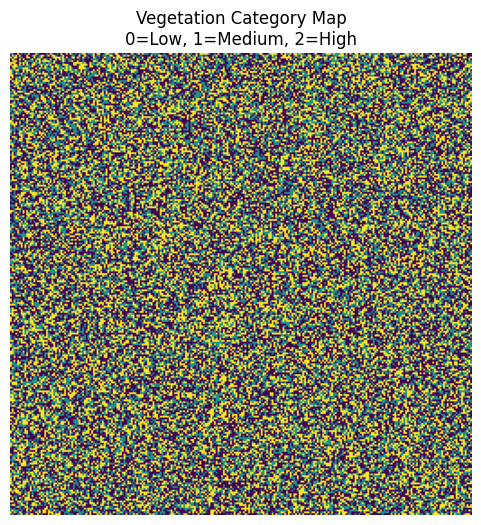

In [5]:
# Step 1: Normalize
norm_image = image / 255.0

# Step 2: Classification Map
category_map = np.zeros_like(norm_image)

category_map[norm_image > 0.7] = 2   # High vegetation
category_map[(norm_image >= 0.4) & (norm_image <= 0.7)] = 1  # Medium
category_map[norm_image < 0.4] = 0   # Low

# Step 3: Percentage areas
total_pixels = norm_image.size
low = np.sum(category_map == 0) / total_pixels * 100
medium = np.sum(category_map == 1) / total_pixels * 100
high = np.sum(category_map == 2) / total_pixels * 100

print("Low Vegetation     :", round(low, 2), "%")
print("Medium Vegetation  :", round(medium, 2), "%")
print("High Vegetation    :", round(high, 2), "%")

# Step 4: Visualization
plt.figure(figsize=(6, 6))
plt.title("Vegetation Category Map\n0=Low, 1=Medium, 2=High")
plt.imshow(category_map, cmap='viridis'), plt.axis('off')
plt.show()


# Output Interpretation

In [ ]:
Low Vegetation     : 32.71 %
Medium Vegetation  : 45.86 %
High Vegetation    : 21.43 %
